# A.2题 新机器购入问题

### 问题重述

如果工厂考虑投资扩大生产，假设每种机床投资相同<br>请给出如果可以投资购买新的机床设备数量为一台、两台、三台三种情况下应分别购买哪些机床设备及增加的利润（新买的机床不考虑整修）。

### 问题分析

在A.1问题中已经实现了对本问题内核线性规划问题的求解<br><br>
因此可以将本问题视为：<br><br>
<font size=4>如果改变初始的机器设置，对最终最大利润有什么影响<font>

### 问题实现

由于问题维度较低(<=3)<br>
<br>
在此处给出两种方式求解本问题:<br>


#### 遍历所有可能的初始情况，寻找最大利润

由于增加1-3台机器时，时间复杂度并没有超过可接受范围。<br>
<br>
<font size=3 color =red>枚举所有情况进行寻找最大利润可能 <font><br>

##### 导入已实现的本问题求解内核

In [1]:
from core import LinearProblem
import copy
problem=LinearProblem.LinearCore()

初始的Machine表

In [2]:
Machine_base = [[4, 3, 4, 2, 1],
            [6, 2, 4, 2, 1],
            [6, 3, 4, 1, 1],
            [6, 3, 3, 2, 1],
            [5, 2, 4, 2, 1],
            [6, 3, 3, 2, 0]]  # 第i月，第num号机器的数量

In [3]:
max_fit=0
max_machine=[]

##### case 1 :增加一台机器

In [8]:
max_fit=0
max_machine=[]
for i in range(5):
    Machine_temp=copy.deepcopy(Machine_base)
    for j in range(6):
        Machine_temp[j][i]+=1
    problem.reset_machine(Machine_temp)
    fit_temp=problem.solveP()
    if fit_temp >= max_fit:
        max_fit=fit_temp
        max_machine=Machine_temp
print('最大利润为',max_fit,'此时的机器表为',max_machine)
print('总用时0.2s')

C:\Users\12780\AppData\Roaming\Python\Python39\site-packages\pulp\pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


最大利润为 106264.5 此时的机器表为 [[4, 3, 4, 2, 2], [6, 2, 4, 2, 2], [6, 3, 4, 1, 2], [6, 3, 3, 2, 2], [5, 2, 4, 2, 2], [6, 3, 3, 2, 1]]
总用时0.2s


<font color=red>由输出可知最大利润为106264.5，增加5号机</font>

##### case 2 增加两台机器

In [10]:
max_fit=0
max_machine=[]
for i in range(5):
    for k in range(5):
        Machine_temp=copy.deepcopy(Machine_base)
        for j in range(6):
            Machine_temp[j][i]+=1
            Machine_temp[j][k]+=1
        problem.reset_machine(Machine_temp)
        fit_temp=problem.solveP()
        if fit_temp >= max_fit:
            max_fit=fit_temp
            max_machine=Machine_temp
print('最大利润为',max_fit,'此时的机器表为',max_machine)
print('总用时1.2s')

最大利润为 111559.0 此时的机器表为 [[5, 3, 4, 2, 2], [7, 2, 4, 2, 2], [7, 3, 4, 1, 2], [7, 3, 3, 2, 2], [6, 2, 4, 2, 2], [7, 3, 3, 2, 1]]
总用时1.2s


<font color=red>由输出可知最大利润为111559.0，增加5号机和1号机各一台</font>

##### case 3 增加3台机器

In [13]:
max_fit=0
max_machine=[]
for i in range(5):
    for k in range(5):
        for l in range(5):
            Machine_temp=copy.deepcopy(Machine_base)
            for j in range(6):
                Machine_temp[j][i]+=1
                Machine_temp[j][k]+=1
                Machine_temp[j][l]+=1
            problem.reset_machine(Machine_temp)
            fit_temp=problem.solveP()
            if fit_temp >= max_fit:
                max_fit=fit_temp
                max_machine=Machine_temp
print('最大利润为',max_fit,'此时的机器表为',max_machine)
print('总用时5.8s')

C:\Users\12780\AppData\Roaming\Python\Python39\site-packages\pulp\pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


最大利润为 113860.0 此时的机器表为 [[6, 3, 4, 2, 2], [8, 2, 4, 2, 2], [8, 3, 4, 1, 2], [8, 3, 3, 2, 2], [7, 2, 4, 2, 2], [8, 3, 3, 2, 1]]
总用时5.8s


<font color=red>由输出可知最大利润为113860.0，增加5号机一台和1号机二台</font>

##### 总结

| 增加的机器总数 | 最大利润 | 方案 |
| -------------- | -------- | ---- |
| 1              | 106264.5       | 5号机 * 1    |
| 2              | 111559.0        | 1号机 * 1 5号机 * 1    |
| 3              | 113860.0        | 1号机 * 2 5号机 * 1    |

### 利用决策树模型高效预测

将core内核看作如下问题：<br>
<font size =5 >输入一个30维向量，每6维代表一个机器在6个月的机器数，core接受输入，输出浮点数代表利润</font><br>
<br>
具体的训练方式详见<font size=5>"A.3题解.ipynb"</font>，在此仅利用训练好的模型进行属性特征值排序

利用决策树模型进行属性特征值排序

该方法在维度较低时效率很低，但是随着维度上升，效率明显超过枚举法

读入决策树模型

In [1]:
import joblib
from scipy.optimize import basinhopping
import numpy as np
name = 'model\\model-judgetree.pkl'
models = joblib.load(name)

In [2]:
Machine_base = [[4, 3, 4, 2, 1],
               [6, 2, 4, 2, 1],
               [6, 3, 4, 1, 1],
               [6, 3, 3, 2, 1],
               [5, 2, 4, 2, 1],
               [6, 3, 3, 2, 0]]
Machine_base=np.array(Machine_base).transpose()

In [3]:
print(Machine_base)

[[4 6 6 6 5 6]
 [3 2 3 3 2 3]
 [4 4 4 3 4 3]
 [2 2 1 2 2 2]
 [1 1 1 1 1 0]]


考虑增加k个机器的问题，两种方法的效率差异

In [4]:
def k_problem_judgetree(k:int):
    def generate_vectors(k, dim=5):
        grids = np.mgrid[[slice(0, k+1) for _ in range(dim)]]
        vectors = grids.reshape(dim, -1).T
        valid_vectors = vectors[np.sum(vectors, axis=1) == k]
        return valid_vectors
    pro_array=generate_vectors(k)
    base=[]
    for i in range(5):
        base.append(Machine_base[i])
    vector=[]
    answer=[]
    for i in range(len(pro_array)):
        for j in range(5):
            vector.append(base[j]+pro_array[i][j])
        answer.append(np.array(vector))
        vector=[]
    return answer

In [15]:
import time
from core import LinearProblem
import joblib
time2=[]
time1=[]

In [16]:

def test(k):
    def judgetree(k:int):
        base=k_problem_judgetree(k)
        DATA=np.array(base).reshape(-1,30)
        model=joblib.load('model\\model-judgetree.pkl')
        PRE=model.predict(DATA)
        temp=np.unravel_index(np.argmax(PRE), PRE.shape)
    for i in range(1,k):
        start_time = time.time()
        # 调用函数
        judgetree(i)
        # 记录结束时间
        end_time = time.time()
        time1.append(end_time - start_time)
    
    def hand(k):
        max0=0
        max_fit=0
        base=k_problem_judgetree(k)
        problem=LinearProblem.LinearCore()
        for i in range(len(base)):
            input=base[i].transpose().tolist()
            problem.reset_machine(input)
            answer=problem.solveP()
            if answer>max_fit:
                max0=i
                max_fit=answer
    for i in range(1,k):
        start_time = time.time()
        # 调用函数
        hand(i)
        # 记录结束时间
        end_time = time.time()
        time2.append(end_time - start_time)
        print(f"{i} is over")

以25维问题为例

In [ ]:
test(25)

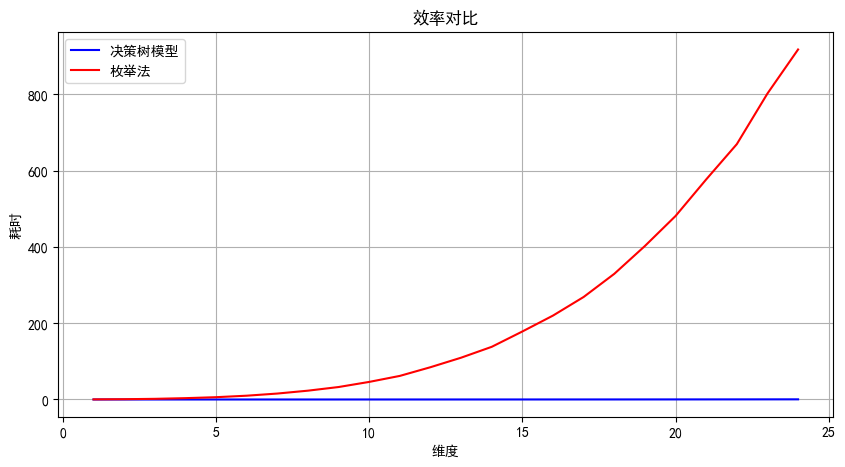

In [34]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = [u'simHei'] 
plt.rcParams['axes.unicode_minus'] = False     
plt.figure(figsize=(10, 5))
plt.plot(range(1, 25), time1, color='blue', label='决策树模型')
plt.plot(range(1, 25), time2, color='red', label='枚举法')
plt.title('效率对比')
plt.xlabel('维度')
plt.ylabel('耗时')
plt.legend()
plt.grid(True)
plt.show()

可以发现当维度进一步提升时，模型预测法几乎不发生明显时间复杂度变化，枚举法接近指数上升